## Importing the necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading the DataSets

In [7]:
df=pd.read_csv('Data_Sets/food_adulteration_data.csv')

## Data explorations and the Initial Inspection

In [9]:
df.head()

,adulteration_id,product_name,brand,category,adulterant,detection_date,detection_method,severity,health_risk,action_taken
0,1,Butter,BrandB,Meat,Artificial sweeteners,5/11/2024,Microbiological Analysis,Moderate,Low,Product Recall
1,2,Chicken,BrandC,Dairy,Coloring agents,5/23/2024,Sensory Evaluation,Severe,Medium,Warning Issued
2,3,Yogurt,BrandC,Meat,Artificial sweeteners,2/17/2024,Sensory Evaluation,Severe,High,Investigation Launched
3,4,Wine,BrandB,Beverages,Coloring agents,5/16/2024,Spectroscopy,Minor,Medium,Product Recall
4,5,Bread,BrandD,Dairy,Water,6/6/2024,Chemical Analysis,Severe,Medium,Warning Issued


In [12]:
df.shape

(1000, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   adulteration_id   1000 non-null   int64 
 1   product_name      1000 non-null   object
 2   brand             1000 non-null   object
 3   category          1000 non-null   object
 4   adulterant        1000 non-null   object
 5   detection_date    1000 non-null   object
 6   detection_method  1000 non-null   object
 7   severity          1000 non-null   object
 8   health_risk       1000 non-null   object
 9   action_taken      1000 non-null   object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


## Describing summary of the dataset

In [17]:
df.describe()

,adulteration_id
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


## Vision over a columns in a dataset

In [20]:
list(df.columns)

['adulteration_id',
 'product_name',
 'brand',
 'category',
 'adulterant',
 'detection_date',
 'detection_method',
 'severity',
 'health_risk',
 'action_taken']

In [24]:
df=df.drop(['adulteration_id'],axis=1)

In [26]:
df=df.drop(['detection_date'],axis=1)

In [30]:
df=df.drop(['action_taken'],axis=1)

In [32]:
df.head()

,product_name,brand,category,adulterant,detection_method,severity,health_risk
0,Butter,BrandB,Meat,Artificial sweeteners,Microbiological Analysis,Moderate,Low
1,Chicken,BrandC,Dairy,Coloring agents,Sensory Evaluation,Severe,Medium
2,Yogurt,BrandC,Meat,Artificial sweeteners,Sensory Evaluation,Severe,High
3,Wine,BrandB,Beverages,Coloring agents,Spectroscopy,Minor,Medium
4,Bread,BrandD,Dairy,Water,Chemical Analysis,Severe,Medium


In [36]:
print(list(df.columns))

['product_name', 'brand', 'category', 'adulterant', 'detection_method', 'severity', 'health_risk']


In [38]:
data=df
for column in data.columns:
    unique_values = data[column].unique()
    print(f"unique values in {column} column:")
    print(unique_values)
    print()

unique values in product_name column:
['Butter' 'Chicken' 'Yogurt' 'Wine' 'Bread' 'Beef' 'Juice' 'Milk' 'Cheese'
 'Honey']

unique values in brand column:
['BrandB' 'BrandC' 'BrandD' 'BrandA' 'BrandE']

unique values in category column:
['Meat' 'Dairy' 'Beverages' 'Bakery' 'Condiments']

unique values in adulterant column:
['Artificial sweeteners' 'Coloring agents' 'Water' 'Melamine' 'Chalk']

unique values in detection_method column:
['Microbiological Analysis' 'Sensory Evaluation' 'Spectroscopy'
 'Chemical Analysis']

unique values in severity column:
['Moderate' 'Severe' 'Minor']

unique values in health_risk column:
['Low' 'Medium' 'High']



In [40]:
data.to_csv('Data_sets/filtered_data.csv')

## Loading and Working on Filtered Dataset

In [43]:
data=pd.read_csv('Data_Sets/filtered_data.csv')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   product_name      1000 non-null   object
 2   brand             1000 non-null   object
 3   category          1000 non-null   object
 4   adulterant        1000 non-null   object
 5   detection_method  1000 non-null   object
 6   severity          1000 non-null   object
 7   health_risk       1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [47]:
data=data.drop(columns=data.columns[0], axis=1)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      1000 non-null   object
 1   brand             1000 non-null   object
 2   category          1000 non-null   object
 3   adulterant        1000 non-null   object
 4   detection_method  1000 non-null   object
 5   severity          1000 non-null   object
 6   health_risk       1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [51]:
pd.set_option('display.max_columns',None)
print("First few rows of data: ")
print(data.head())

First few rows of data: 
  product_name   brand   category             adulterant  \
0       Butter  BrandB       Meat  Artificial sweeteners   
1      Chicken  BrandC      Dairy        Coloring agents   
2       Yogurt  BrandC       Meat  Artificial sweeteners   
3         Wine  BrandB  Beverages        Coloring agents   
4        Bread  BrandD      Dairy                  Water   

           detection_method  severity health_risk  
0  Microbiological Analysis  Moderate         Low  
1        Sensory Evaluation    Severe      Medium  
2        Sensory Evaluation    Severe        High  
3              Spectroscopy     Minor      Medium  
4         Chemical Analysis    Severe      Medium  


In [53]:
data.head()

,product_name,brand,category,adulterant,detection_method,severity,health_risk
0,Butter,BrandB,Meat,Artificial sweeteners,Microbiological Analysis,Moderate,Low
1,Chicken,BrandC,Dairy,Coloring agents,Sensory Evaluation,Severe,Medium
2,Yogurt,BrandC,Meat,Artificial sweeteners,Sensory Evaluation,Severe,High
3,Wine,BrandB,Beverages,Coloring agents,Spectroscopy,Minor,Medium
4,Bread,BrandD,Dairy,Water,Chemical Analysis,Severe,Medium


In [62]:
category_cols=data.select_dtypes(include=['category','object']).columns
numerical_cols=data.select_dtypes(exclude=['category','object']).columns

In [64]:
category_cols

Index(['product_name', 'brand', 'category', 'adulterant', 'detection_method',
       'severity', 'health_risk'],
      dtype='object')

## One hot encoding to the categorical data

In [67]:
#drop numerical columns from the data 
data_categorical = data.drop(columns=numerical_cols)
#perform one-hot encoding on categorical column 
encoded_data = pd.get_dummies(data_categorical,columns=['product_name', 'brand', 'category', 'adulterant', 'detection_method',
       'severity'])

In [69]:
encoded_data.head()

,health_risk,product_name_Beef,product_name_Bread,product_name_Butter,product_name_Cheese,product_name_Chicken,product_name_Honey,product_name_Juice,product_name_Milk,product_name_Wine,product_name_Yogurt,brand_BrandA,brand_BrandB,brand_BrandC,brand_BrandD,brand_BrandE,category_Bakery,category_Beverages,category_Condiments,category_Dairy,category_Meat,adulterant_Artificial sweeteners,adulterant_Chalk,adulterant_Coloring agents,adulterant_Melamine,adulterant_Water,detection_method_Chemical Analysis,detection_method_Microbiological Analysis,detection_method_Sensory Evaluation,detection_method_Spectroscopy,severity_Minor,severity_Moderate,severity_Severe
0,Low,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False
1,Medium,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
2,High,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True
3,Medium,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
4,Medium,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True


In [71]:
final_data = encoded_data

In [73]:
final_data.head()

,health_risk,product_name_Beef,product_name_Bread,product_name_Butter,product_name_Cheese,product_name_Chicken,product_name_Honey,product_name_Juice,product_name_Milk,product_name_Wine,product_name_Yogurt,brand_BrandA,brand_BrandB,brand_BrandC,brand_BrandD,brand_BrandE,category_Bakery,category_Beverages,category_Condiments,category_Dairy,category_Meat,adulterant_Artificial sweeteners,adulterant_Chalk,adulterant_Coloring agents,adulterant_Melamine,adulterant_Water,detection_method_Chemical Analysis,detection_method_Microbiological Analysis,detection_method_Sensory Evaluation,detection_method_Spectroscopy,severity_Minor,severity_Moderate,severity_Severe
0,Low,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False
1,Medium,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True
2,High,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True
3,Medium,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False
4,Medium,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model



#Extract features (X) and target variable(Y)
X=final_data.drop('health_risk',axis=1)
y=final_data['health_risk']



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [77]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.98
Testing Accuracy: 0.31


Confusion Matrix:
[[25 23 19]
 [33 22 21]
 [17 25 15]]


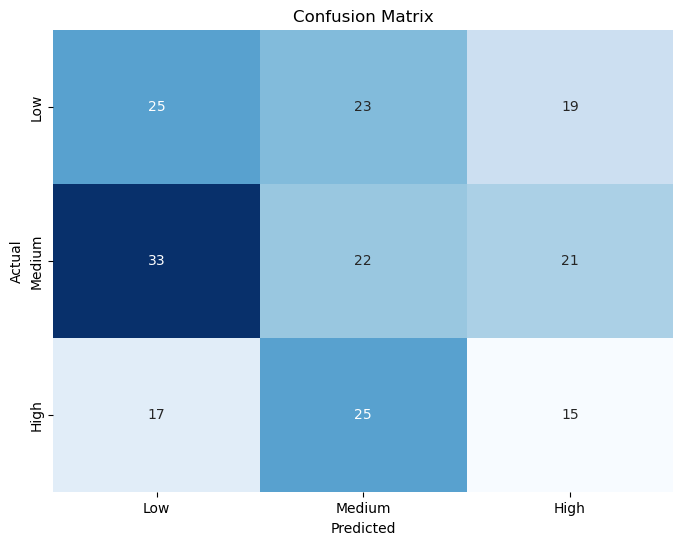

In [83]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'Medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [88]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


Model saved at ML_MODEL/decision_tree_model.pkl


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

In [92]:
# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [94]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.98
Testing Accuracy: 0.36


Confusion Matrix:
[[24 26 17]
 [20 34 22]
 [18 24 15]]


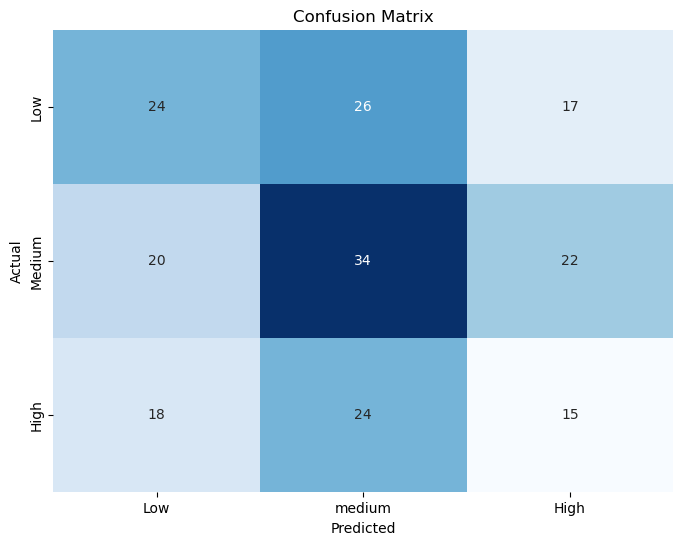

In [96]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/random_forest_model.pkl


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [104]:
#Extract features (X) and target variable(Y)
X=final_data.drop('health_risk',axis=1)
y=final_data['health_risk']



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
# Initialize logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [108]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.41
Testing Accuracy: 0.34


Confusion Matrix:
[[21 21 25]
 [14 29 33]
 [16 23 18]]


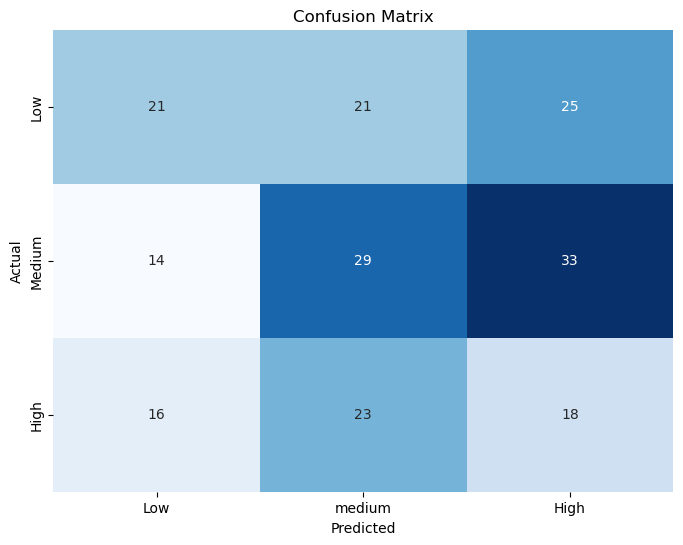

In [110]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [112]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/logistic_regression_model.pkl


In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [118]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.57
Testing Accuracy: 0.39


Confusion Matrix:
[[33 22 12]
 [22 38 16]
 [32 18  7]]


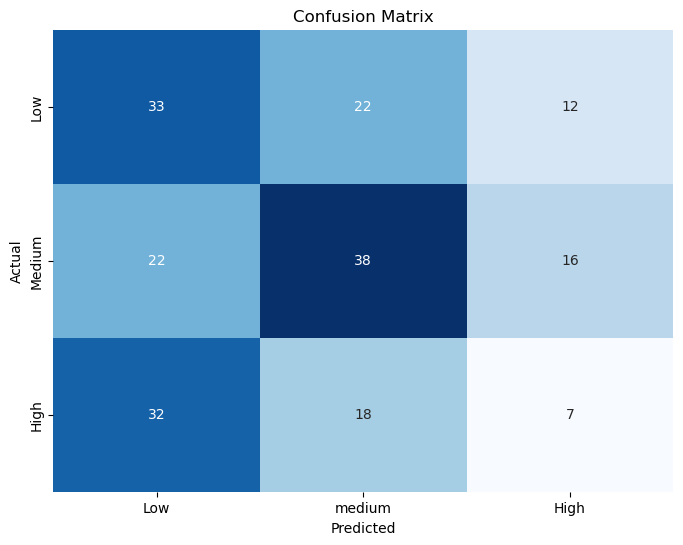

In [120]:

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [122]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/knn_model.pkl


In [124]:
from sklearn.naive_bayes import GaussianNB

In [126]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

GaussianNB()

In [128]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.39
Testing Accuracy: 0.35


Confusion Matrix:
[[27 17 23]
 [21 25 30]
 [14 24 19]]


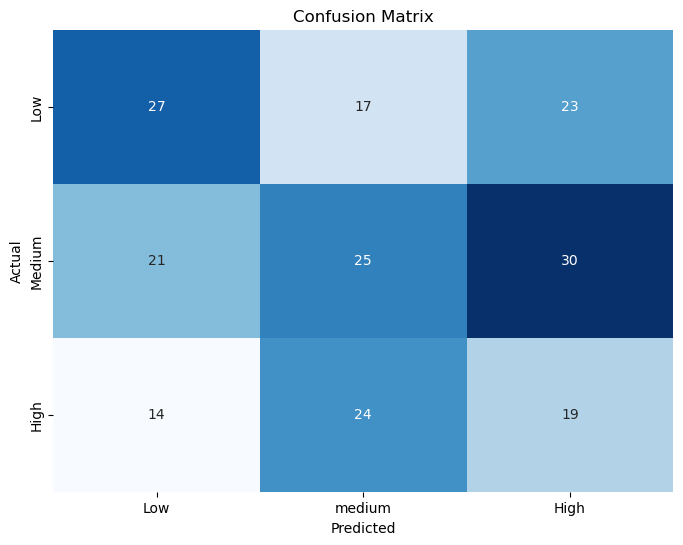

In [130]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [132]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/naive_bayes_model.pkl


In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [136]:
X = final_data.drop('health_risk', axis=1)
y = final_data['health_risk']

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [144]:
# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.43
Testing Accuracy: 0.34


Confusion Matrix:
[[22 18 27]
 [19 28 29]
 [16 22 19]]


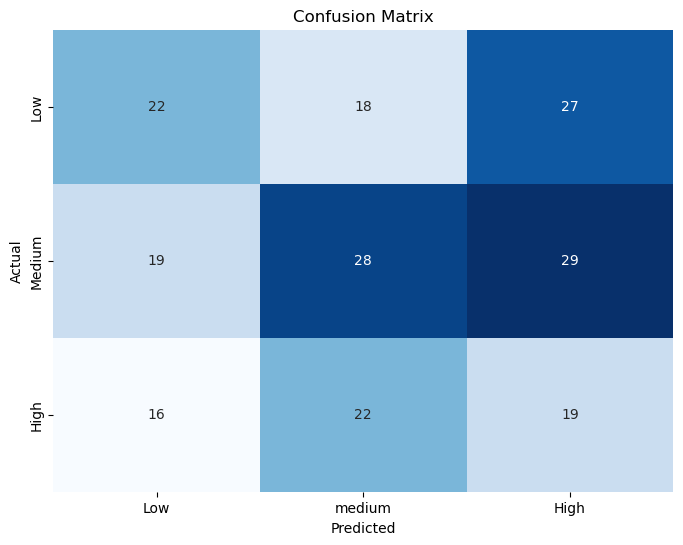

In [146]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low', 'medium','High'], yticklabels=['Low', 'Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [148]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/MultibinomialNB_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/MultibinomialNB_model.pkl


In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [152]:
X = final_data.drop('health_risk', axis=1)
y = final_data['health_risk']

In [158]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Classifier
model = GradientBoostingClassifier( random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [162]:
# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_accuracy}')
print(f'Testing accuracy: {test_accuracy}')



Training accuracy: 0.6925
Testing accuracy: 0.395


In [164]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/gradient_boosting_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/gradient_boosting_model.pkl
